MUHAMMAD HAYKAL KAMIL 

IF-43-11 

1301194387 

In [126]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

In [127]:
kendaraan = pd.read_csv("kendaraan_test.csv")
kendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


#Pre Processing

Changing all data to be numerical. If the data types is an enum, then return the index values of each enum.

In [128]:
def toNumeric(dataset) :
  tmp = dataset.copy()
  listcol = list(tmp.columns)
  datatypecol = dict(tmp.dtypes)
  variasi = []
  for x in listcol:
    if datatypecol.get(x) == "object" :
      variasi.append((x,list(dataset.groupby(x).groups.keys())))
  for x in variasi:
    #tmp[x[0]] = tmp[x[0]].replace([])
    for i in x[1] :
      idx = x[1].index(i)
      tmp[x[0]] = tmp[x[0]].replace([i],idx)

  return tmp

numerick = toNumeric(kendaraan)
numerick.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0


Creating a list of column that if there is a NaN value in this column then don't drop the row

In [129]:
def DoNotDropList(dataset):
  dropnanlist = []
  datatypecol = dict(dataset.dtypes)
  listcol = list(dataset.columns)
  for x in listcol:
    ngroup = dataset.groupby(x).ngroups
    if ngroup > 5:
      dropnanlist.append(x)
  return dropnanlist
  
nodrop = DoNotDropList(numerick) 
print(nodrop)

['Umur', 'Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']


From the function above, we use it here. Calculate the skewness of each column then if the skewness of the column is between 2 and -2, then calculate the mean of the column and fill the empty data with it. Else, calculate the median of the column and fill the empty data with it.

In [130]:
def FillNanSkew(dataset):
  dndlist = DoNotDropList(dataset)
  skew = dataset[dndlist].skew(axis=0, skipna=True)
  #skewness > 2 or < -2 = median
  #else mean
  for i in range(len(skew)):
    if skew[i] > -2 and skew[i] < 2 :
      dataset[dndlist[i]].fillna(dataset[dndlist[i]].mean(),inplace=True)
    else:
      dataset[dndlist[i]].fillna(dataset[dndlist[i]].median(),inplace=True)
  return dataset


In [131]:
def DropOutlier(dataset):
  Q1 = dataset.quantile(0.25)
  Q3 = dataset.quantile(0.75)
  IQR = Q3 - Q1
  return dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

DropOutlier(kendaraan)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
5,Pria,26,1,28,1,< 1 Tahun,Tidak,42721,152,198,0
...,...,...,...,...,...,...,...,...,...,...,...
47633,Wanita,60,1,28,0,1-2 Tahun,Pernah,50937,26,149,0
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0


This function is the opposite of the function above. If the column type is enum and the data is empty then drop the row

In [132]:
def DropNan(dataset):
  droplist = []
  datatypecol = dict(dataset.dtypes)
  listcol = list(dataset.columns)
  for x in listcol:
    ngroup = dataset.groupby(x).ngroups
    if ngroup <= 5:
      dataset = dataset[dataset[x].notna()]
  return dataset

print(DropNan(numerick))  

       Jenis_Kelamin  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0                  1    49    1  ...               26                145         0
1                  0    22    1  ...              152                241         0
2                  0    24    1  ...              152                 62         0
3                  0    46    1  ...              124                 34         0
4                  0    35    1  ...              152                229         0
...              ...   ...  ...  ...              ...                ...       ...
47634              0    61    1  ...              124                 67         0
47635              0    41    1  ...              157                232         0
47636              0    24    1  ...              152                211         0
47637              0    59    1  ...               26                239         1
47638              0    52    1  ...              124                170         0

[47

All of those above will be compiled into 1 function.

In [133]:
def PreProcessing(dataset,dtype=int):
  
  try:
    dataset = dataset.drop(columns=['id']) #drop the id column
  except:
    dataset = dataset
  dataset = dataset.drop_duplicates() #drop duplicate values
  dataset = toNumeric(dataset)        #changing enum value to their index
  dataset = FillNanSkew(dataset)      #Fill the NaN values
  dataset = DropNan(dataset)          #Drop the row if the data was enum
  dataset = dataset.astype(dtype)
  dataset = DropOutlier(dataset)
  dataset = dataset.drop_duplicates
  return dataset

prep = PreProcessing(kendaraan)
print(prep.info())
prep.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40603 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      40603 non-null  int64
 1   Umur               40603 non-null  int64
 2   SIM                40603 non-null  int64
 3   Kode_Daerah        40603 non-null  int64
 4   Sudah_Asuransi     40603 non-null  int64
 5   Umur_Kendaraan     40603 non-null  int64
 6   Kendaraan_Rusak    40603 non-null  int64
 7   Premi              40603 non-null  int64
 8   Kanal_Penjualan    40603 non-null  int64
 9   Lama_Berlangganan  40603 non-null  int64
 10  Tertarik           40603 non-null  int64
dtypes: int64(11)
memory usage: 3.7 MB
None


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,40603.000000,40603.000000,40603.0,40603.000000,40603.000000,40603.000000,40603.000000,40603.000000,40603.000000,40603.000000,40603.0
mean,0.466222,37.934906,1.0,26.322070,0.523656,0.543359,0.564195,29237.337216,115.608132,154.160973,0.0
std,0.498864,15.721551,0.0,13.483571,0.499446,0.559860,0.495868,14659.762196,53.069008,83.677766,0.0
min,0.000000,20.000000,1.0,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.0
25%,0.000000,24.000000,1.0,15.000000,0.000000,0.000000,0.000000,24025.000000,120.000000,81.000000,0.0
50%,0.000000,33.000000,1.0,28.000000,1.000000,1.000000,1.000000,31278.000000,152.000000,155.000000,0.0
75%,1.000000,49.000000,1.0,36.000000,1.000000,1.000000,1.000000,38461.000000,152.000000,227.000000,0.0
max,1.000000,85.000000,1.0,52.000000,1.000000,2.000000,1.000000,62091.000000,163.000000,299.000000,0.0


In [134]:
def DataSplit(dataset,frac):
  train=dataset.sample(frac=0.8,random_state=rand.randint(0,dataset.shape[0])) #random state is a seed value
  test=dataset.drop(train.index)
  return train,test

datatrain,datatest = DataSplit(kendaraan,0.8)

In [135]:
datatrain

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
38838,Wanita,28,1,9,1,< 1 Tahun,Tidak,25547,152,170,0
46029,Wanita,25,1,8,1,< 1 Tahun,Tidak,35138,152,143,0
16016,Wanita,21,1,28,1,< 1 Tahun,Tidak,22915,160,25,0
43722,Wanita,53,1,28,0,1-2 Tahun,Pernah,70464,26,37,1
28988,Pria,23,1,30,1,< 1 Tahun,Tidak,24423,152,58,0
...,...,...,...,...,...,...,...,...,...,...,...
43771,Pria,52,1,30,0,1-2 Tahun,Pernah,32751,26,147,0
41574,Pria,41,1,28,0,1-2 Tahun,Pernah,58495,15,270,0
24331,Pria,49,1,14,0,> 2 Tahun,Pernah,28786,124,175,0
33993,Wanita,23,1,17,1,< 1 Tahun,Tidak,37625,152,82,0


In [136]:
datatest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1
25,Wanita,26,1,25,0,< 1 Tahun,Tidak,16230,152,15,0
26,Pria,52,1,30,0,1-2 Tahun,Pernah,2630,152,144,0
37,Wanita,23,1,30,1,< 1 Tahun,Tidak,53635,152,99,0
...,...,...,...,...,...,...,...,...,...,...,...
47614,Wanita,47,1,28,1,1-2 Tahun,Tidak,55358,122,255,0
47620,Pria,56,1,28,1,1-2 Tahun,Tidak,25120,26,211,0
47624,Pria,25,1,48,1,< 1 Tahun,Tidak,2630,152,187,0
47627,Wanita,22,1,41,1,< 1 Tahun,Tidak,29272,26,58,0


In [137]:
def detect_outlier(dataset):
  Q1 = dataset.quantile(0.25)
  Q3 = dataset.quantile(0.75)
  IQR = Q3 - Q1

  return ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()

detect_outlier(prep)

Jenis_Kelamin           0
Umur                    0
SIM                     0
Kode_Daerah             0
Sudah_Asuransi          0
Umur_Kendaraan          0
Kendaraan_Rusak         0
Premi                 223
Kanal_Penjualan      9958
Lama_Berlangganan       0
Tertarik                0
dtype: int64

Convert Dataset to List for convenient 

In [138]:
def DatasetToList(dataset,cols =[]):
  if cols == [] :
    cols=dataset.columns
  #ambil 2 kolom dari dataset
  dataset_matrix = dataset[cols].copy(deep=True)
  #urutkan data dari yang terkecil sampai terbesar
  try:
    dataset_matrix.sort_values(by=cols, inplace=True)
  #rubah menjadi array
    dataset_arr = np.array(dataset_matrix)
    return dataset_arr.tolist()
  except:
    return dataset

d = DatasetToList(prep,['Kanal_Penjualan','Umur','Lama_Berlangganan'])


# Pemodelan


Calculate the distances with euclidean

In [139]:
def calculateDistance(p1,p2):
  totalMargin = 0
  try:
    for i in range(len(p1)):
      margin = p1[i] - p2[i]
      pmargin = margin**2
      totalMargin = totalMargin + pmargin

    return totalMargin**(1/2)
  except:
    return 0

a = [4,1]
b = [3,9]
print(calculateDistance(a,b))

8.06225774829855


Calculate the data range in every column

In [140]:
def MinMax(arr):
  minmax = []
  for i in range(len(arr[0])) :
    tmp = []
    for j in range(len(arr)):
      tmp.append(arr[j][i])
    minmax.append([min(tmp),max(tmp)])
  return minmax

print(MinMax(d))

[[1, 163], [20, 85], [10, 299]]


Place k amount of random centeroid

In [141]:
def RandomCenteroid(k,arr):
  kcenter = []
  minmax = MinMax(arr)
  for i in range(k):
    y=0
    center=[]
    for j in minmax:
      try:
        y = rand.randrange(j[0],j[1])
      except:
        y = rand.uniform(j[0],j[1])
      center.append(y)
    kcenter.append(center)
  return kcenter

rc = RandomCenteroid(3,d)
print(rc)

[[42, 31, 28], [47, 79, 34], [61, 33, 185]]


Calculate the mean of the list

In [142]:
def MatrixMean(arr):
  matrix = []
  try:
    for i in range(len(arr[0])):
      tmp = []
      j = 0
      for j in range(len(arr)):
        tmp.append(arr[j][i])
      mean = sum(tmp)/len(tmp)
      matrix.append(mean)
  except:
    print(len(arr))
    matrix = []
  return matrix
print(MatrixMean(d))

[115.60813240400955, 37.93490628771273, 154.16097332709407]


Clustering the list based on the centeroids

In [143]:
def ClusterArray(arr,centeroids):
  kcluster = [] #[[],[],[]]
  for j in range(len(centeroids)):
    kcluster.append([])
  for i in range(len(arr)):
    ranges = [] #list untuk setiap perhitungan euclidean 
    #[3,1,2]
    for c in centeroids:
      r = calculateDistance(arr[i],c)
      ranges.append(r)
    m = min(ranges)
    idx = ranges.index(m)
    kcluster[idx].append(arr[i])
  return kcluster

ca = ClusterArray(d,rc)
#print(tabulate(tca,headers=["Cluster 1","Cluster 2","Cluster 3"], tablefmt="orgtbl"))

To calculate how varient the data is

the lower the score, more variant the clusters are



In [144]:
def ScoreVariasi(arr):
  data=[]
  for i in arr :
    data.append(len(i))
  total = 0
  for x in data:
    total = total + x
  mean = total / len(data)
  total = 0
  for x in data:
    total = total + abs(x-mean)
  return total / len(data)

data=[]
for i in ca :
  data.append(len(i))
print(data)
print(ScoreVariasi(ca))

[8974, 3811, 27818]
9522.444444444445


K-Mean processing

In [145]:
def kMeanR(arr,cen, clustered, count, cur_var):
  #print(cur_var)
  if count >=2 :
    return clustered,cen
  if cur_var == -1 :
    #print("initiating")
    clustered = ClusterArray(arr,cen)
    this_var = ScoreVariasi(clustered)
    return kMeanR(arr,cen,clustered,0,this_var)
  else :
    c = []
    
    for x in clustered:
      c.append(MatrixMean(x))

    cl = ClusterArray(arr,c)
    this_var = ScoreVariasi(cl)
    if this_var == cur_var :
      return kMeanR(arr,c,cl,count+1,cur_var)
    else:
      return kMeanR(arr,c,cl,0,this_var)

def kMeanRecursive(arr,init_centeroid):
  return kMeanR(arr,init_centeroid,[],0,-1)

result,centeroids = kMeanRecursive(d,rc)
data=[]
for i in result :
  data.append(len(i))
print(centeroids)
print(data,len(d))
print(ScoreVariasi(result))

[[145.12674302788844, 33.34069970119522, 85.09829432270917], [25.061835200680754, 51.779322081974186, 112.18919302226635], [125.00057182067704, 36.57307868252516, 234.52270128087832]]
[16070, 7051, 17482] 40603
4322.222222222222


In [146]:
def kMeanIteration(arr,centeroids):
  cen = centeroids
  clustered = ClusterArray(arr,cen)
  cur_var = ScoreVariasi(clustered)
  counter = 0
  while True:
    cen = []
    for x in clustered:
      cen.append(MatrixMean(x))
    clustered = ClusterArray(arr,cen)
    this_var = ScoreVariasi(clustered)
    if this_var == cur_var :
      counter=counter+1
    else:
      cur_var = this_var
    if counter >= 2 :
      break
  return clustered,cen

result,centeroids = kMeanIteration(d,rc)
data=[]
for i in result :
  data.append(len(i))
print(centeroids)
print(data,len(d))
print(ScoreVariasi(result))

[[145.12674302788844, 33.34069970119522, 85.09829432270917], [25.061835200680754, 51.779322081974186, 112.18919302226635], [125.00057182067704, 36.57307868252516, 234.52270128087832]]
[16070, 7051, 17482] 40603
4322.222222222222


Compile it into a class

In [228]:
class KMeans:
  #this class essentially will store the processed centeroids
  def __init__(self,n_cluster,data_train):
    self.n_cluster=n_cluster
    self.centeroids = RandomCenteroid(n_cluster,data_train)
    self.data_train= []
    self.fit(data_train)
  
  def fit(self,new_data):
    self.data_train= self.data_train + new_data
    _,centeroids = kMeanRecursive(self.data_train,self.centeroids)
    self.centeroids = centeroids
  
  def predict(self,data):
    return ClusterArray(data,self.centeroids)

  def getCenteroids(self):
    return self.centeroids


#View Functions

In [148]:
def CountClusters(clustered):
  counts = []
  for x in clustered:
    counts.append(len(x))
  return counts

print(CountClusters(result))

[16070, 7051, 17482]


To calculate distortion for each iteration

The formula for distortion is :

$
\sum ( \left( X_{i}-X_{c}\right)^2 + \left( Y_{i}-Y_{c}\right)^2)
$


In [149]:
def CalculateDistortion(clustering,centeroids):
  total = 0
  for i in range(len(clustering)): #CLUSTERS
    totalpercluster = 0
    for j in range(len(clustering[i])): #ROW
      totalrow = 0
      for k in range(len(clustering[i][j])): #COLUMN
        margin = clustering[i][j][k] - centeroids[i][k]
        pmargin = margin**2
        totalrow = totalrow + pmargin
      totalpercluster = totalpercluster + totalrow
    total=total+totalpercluster
  return total

print(CalculateDistortion(result,centeroids))

131627316.49114895


To seek the most optimal k of the data.

408677616.83033377
195137663.6971807
131310328.65886077
84947431.04737675
75322009.84216122
45156802.866746634
42592849.8860971
33009058.516008724
27252201.51559248


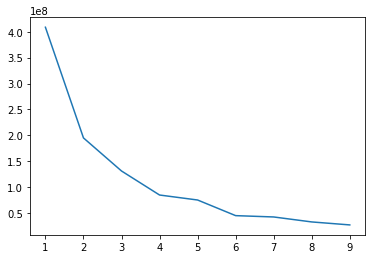

In [150]:
def ElbowDistortion(data):
  x = []
  y = []
  for i in range(1, 10, 1):
    try:
      rc = RandomCenteroid(i,data)
      clustered, cen = kMeanRecursive(data,rc)
      print(CalculateDistortion(clustered,cen))
      y.append(CalculateDistortion(clustered,cen))
      x.append(i)
    except:
      break
  plt.plot(x,y)
  plt.show()

ElbowDistortion(d)

2D PLOT

ini sudah clusterd


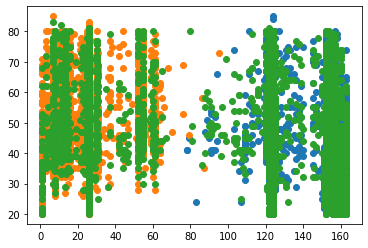

In [151]:
def Scatter2D(clustered,cen=[], labels=[]):
  rs2d = False
  try:
    if clustered[0][0][0]!= None :
      print("ini sudah clusterd")
      rs2d = True
  except :
    rs2d = False
  if rs2d:
    for i in range(len(clustered)):
      x = []
      y = []
      for j in clustered[i]:
        x.append(j[0])
        y.append(j[1])
      plt.scatter(x,y)
  else:
    x = []
    y = []
    for j in clustered:
      x.append(j[0])
      y.append(j[1])
    plt.scatter(x,y)
  if cen!=[] :
    x = []
    y = []
    for i in cen:
      x.append(i[0])
      y.append(i[1])
    plt.scatter(x,y , s = 80)
  if labels != [] :
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
  #plt.legend()
  plt.show()

Scatter2D(result)

3D PLOT

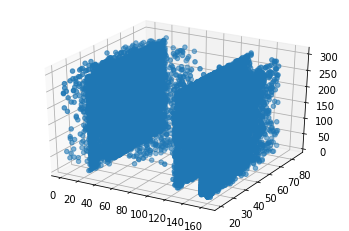

In [152]:
def Scatter3D(clustered,cen=[], labels=[]):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  rs3d = False
  try:
    if clustered[0][0][0]!= None :
      print("ini sudah clusterd")
      rs3d = True
  except :
    rs3d = False
  if rs3d:
    for i in range(len(clustered)):
      x = []
      y = []
      z = []
      for j in clustered[i]:
        x.append(j[0])
        y.append(j[1])
        z.append(j[2])
      ax.scatter(x,y,z)
  else:
    x = []
    y = []
    z = []
    for j in clustered:
      x.append(j[0])
      y.append(j[1])
      z.append(j[2])
    ax.scatter(x,y,z)
  if cen!=[] :    
    x = []
    y = []
    z = []
    for i in cen:
      x.append(i[0])
      y.append(i[1])
      z.append(i[2])
    ax.scatter(x,y,z,s=80)
    #plt.legend()
  if labels != [] :
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
  plt.show()

Scatter3D(d)

4D PLOT

In [153]:
def Scatter4D(clustered,cen=[],labels=[]):
  try:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    rs4d = False
    try:
      if clustered[0][0][0]!= None :
        print("ini sudah clusterd")
        rs4d = True
    except :
      rs4d = False
    if rs4d:
      for i in range(len(clustered)):
        x = []
        y = []
        z = []
        c = []
        for j in clustered[i]:
          x.append(j[0])
          y.append(j[1])
          z.append(j[2])
          c.append(j[3])
        img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
        fig.colorbar(img)
    else:
      x = []
      y = []
      z = []
      c = []
      for j in clustered:
        x.append(j[0])
        y.append(j[1])
        z.append(j[2])
        c.append(j[3])
      img = ax.scatter(x, y, z, c=c)
      fig.colorbar(img)
      #plt.legend()
    if labels != [] :
      ax.set_xlabel(labels[0])
      ax.set_ylabel(labels[1])
      ax.set_zlabel(labels[2])

    plt.show()
  except:
    plt.clear()

1D PLOT

ini sudah clusterd


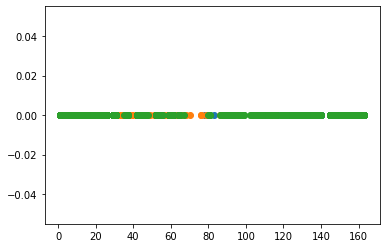

In [154]:
def Scatter1D(clustered,cen=[],labels=[]):
  
  rs1d = False
  try:
    if clustered[0][0][0]!= None :
      print("ini sudah clusterd")
      rs1d = True
  except :
    rs1d = False
  if rs1d:
    for i in range(len(clustered)):
      x = []
      y = []
      for j in clustered[i]:
        x.append(j[0])
        y.append(0)
      plt.scatter(x,y)
  else:
    x = []
    y = []
    for j in clustered:
      x.append(j[0])
      y.append(0)
    plt.scatter(x,y)
  if cen!=[] :
    x = []
    y = []
    for i in cen:
      x.append(i[0])
      y.append(0)
    plt.scatter(x,y , s = 80)
  if labels != [] :
    plt.xlabel(labels[0])
  #plt.legend()
  plt.show()

Scatter1D(result)

Scatter Plot

ini sudah clusterd


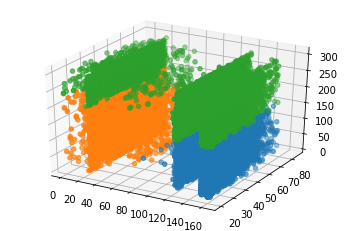

In [155]:
def ScatterPlot(clustered,cen=[],labels=[]):
  l = len(clustered[0])
  try:
    if clustered[0][0][0]!= None :
      l = len(clustered[0][0])
  except :
    pass
  if l == 1:
    Scatter1D(clustered,cen,labels)
  elif l == 2:
    Scatter2D(clustered,cen,labels)
  elif l == 3:
    Scatter3D(clustered,cen,labels)
  elif l == 4:
    Scatter4D(clustered,cen,labels)
  else:
    print("Dimension > 4, can't be visualized by the system")
    
ScatterPlot(result)

Bar Graph


[16070, 7051, 17482]


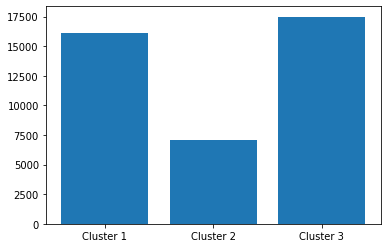

In [156]:
def BarGraph(clustered):
  cc = CountClusters(clustered)
  x = []
  for i in range(len(cc)):
    x.append("Cluster "+str(i+1))
  print(cc)
  plt.bar(x,cc)
  plt.show()
BarGraph(result)

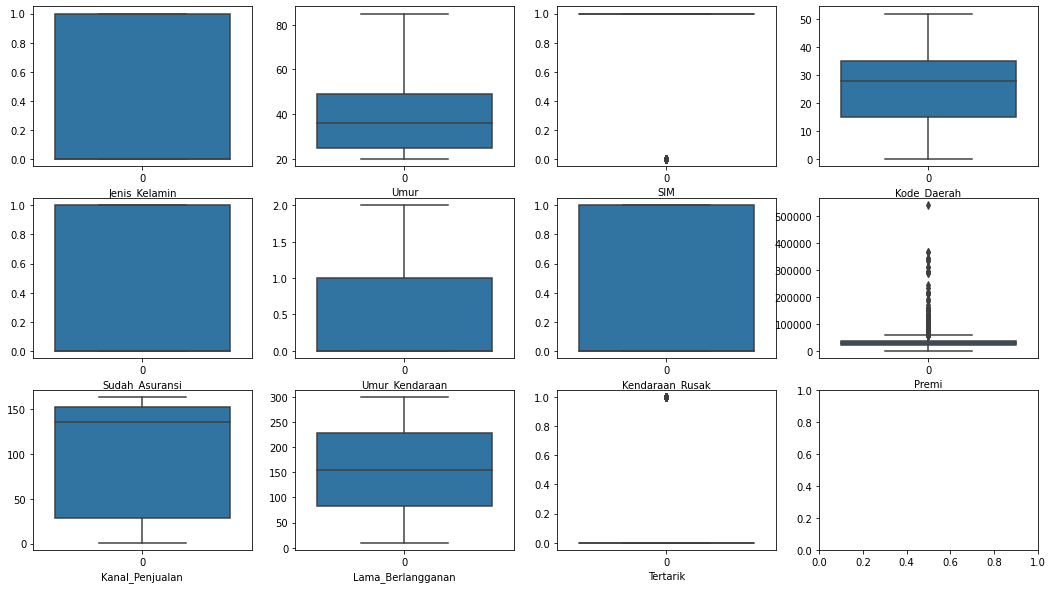

In [157]:
def BoxPlot(dataset):
  fig, axes = plt.subplots(3, 4, figsize=(18, 10))
  x = 0
  y = 0
  for i in dataset.columns :
    try:
      sns.boxplot(ax=axes[x, y], data=dataset[i]).set(xlabel=i)
      y = y+1
      if y >= 4 :
        x = x+1
        y=0
    except:
      pass

BoxPlot(numerick)

#MAIN FUNCTION

In [247]:
train = pd.read_csv("kendaraan_train.csv")
train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


##Explore Data

In [248]:
print("Data size before preprocessing: ",len(train))
print("Empty Datas :")
train.isnull().sum()

Data size before preprocessing:  285831
Empty Datas :


id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [249]:
detect_outlier(train)

Jenis_Kelamin            0
Kanal_Penjualan          0
Kendaraan_Rusak          0
Kode_Daerah              0
Lama_Berlangganan        0
Premi                 7328
SIM                    584
Sudah_Asuransi           0
Tertarik             35006
Umur                     0
Umur_Kendaraan           0
id                       0
dtype: int64

In [250]:
train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


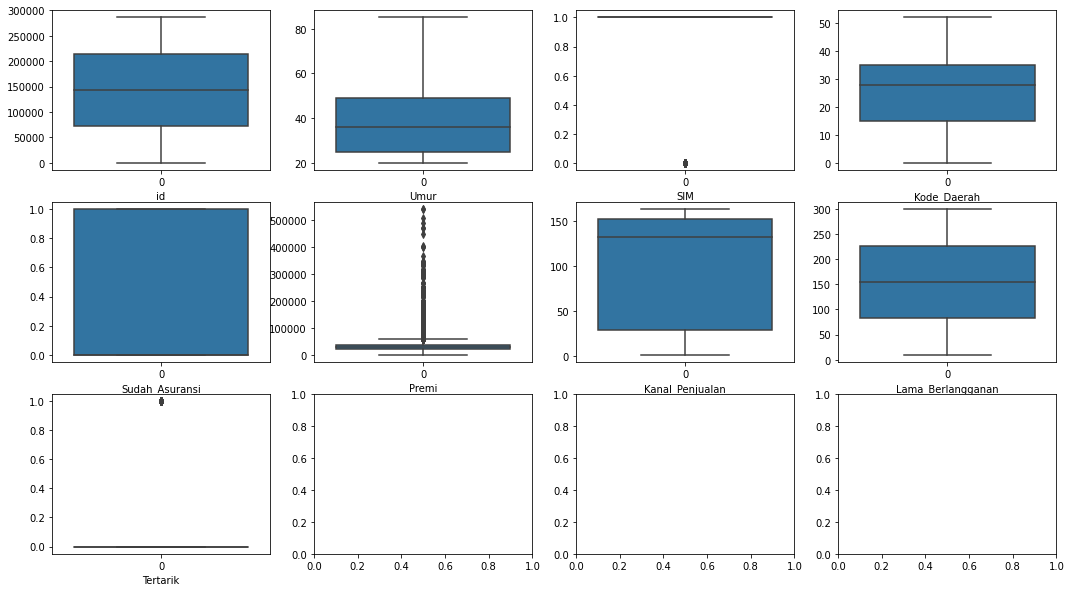

In [251]:
BoxPlot(train)

In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [253]:
train.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


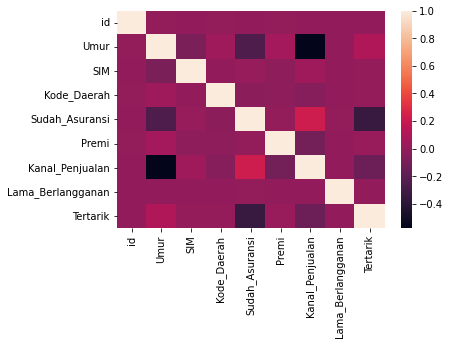

In [255]:
sns.heatmap(train.corr())

##After Preprocessing

In [256]:
dt = PreProcessing(train)
dt.to_csv('processed_kendaraan.csv') #save the processed dataset
print("Data size after preprocessing: ",len(dt))
print("Empty Datas :")
dt.isnull().sum()

Data size after preprocessing:  156672
Empty Datas :


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [257]:
detect_outlier(dt)

Jenis_Kelamin            0
Umur                    31
SIM                      0
Kode_Daerah              0
Sudah_Asuransi           0
Umur_Kendaraan           0
Kendaraan_Rusak          0
Premi                 2761
Kanal_Penjualan      34650
Lama_Berlangganan        0
Tertarik                 0
dtype: int64

In [258]:
dt.corr()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,-0.147721,NaN,-0.003631,0.075494,0.134438,0.085567,-0.048389,0.121925,0.003010,NaN
Umur,-0.147721,1.000000,NaN,0.044102,-0.252765,-0.587777,-0.266410,0.191347,-0.585413,-0.000518,NaN
SIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kode_Daerah,-0.003631,0.044102,NaN,1.000000,-0.025799,-0.036743,-0.028814,-0.015687,-0.050412,-0.005505,NaN
Sudah_Asuransi,0.075494,-0.252765,NaN,-0.025799,1.000000,0.180520,0.821902,-0.108747,0.225365,0.002964,NaN
Umur_Kendaraan,0.134438,-0.587777,NaN,-0.036743,0.180520,1.000000,0.177685,-0.102467,0.476322,0.001191,NaN
Kendaraan_Rusak,0.085567,-0.266410,NaN,-0.028814,0.821902,0.177685,1.000000,-0.113675,0.238296,0.001182,NaN
Premi,-0.048389,0.191347,NaN,-0.015687,-0.108747,-0.102467,-0.113675,1.000000,-0.169111,0.000436,NaN
Kanal_Penjualan,0.121925,-0.585413,NaN,-0.050412,0.225365,0.476322,0.238296,-0.169111,1.000000,0.002093,NaN
Lama_Berlangganan,0.003010,-0.000518,NaN,-0.005505,0.002964,0.001191,0.001182,0.000436,0.002093,1.000000,NaN


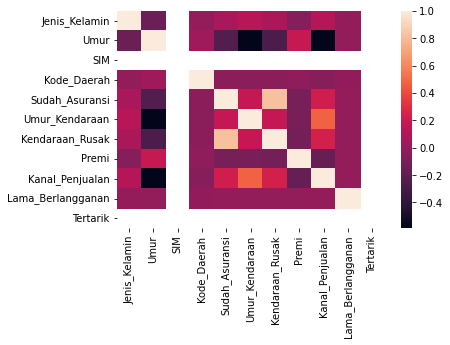

In [259]:
sns.heatmap(dt.corr())

In [260]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156672 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Jenis_Kelamin      156672 non-null  int64
 1   Umur               156672 non-null  int64
 2   SIM                156672 non-null  int64
 3   Kode_Daerah        156672 non-null  int64
 4   Sudah_Asuransi     156672 non-null  int64
 5   Umur_Kendaraan     156672 non-null  int64
 6   Kendaraan_Rusak    156672 non-null  int64
 7   Premi              156672 non-null  int64
 8   Kanal_Penjualan    156672 non-null  int64
 9   Lama_Berlangganan  156672 non-null  int64
 10  Tertarik           156672 non-null  int64
dtypes: int64(11)
memory usage: 14.3 MB


In [261]:
dt.describe()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,156672.000000,156672.000000,156672.0,156672.00000,156672.000000,156672.000000,156672.000000,156672.000000,156672.000000,156672.000000,156672.0
mean,0.477884,37.433415,1.0,26.41629,0.545662,0.565353,0.581948,34264.790065,115.609669,154.171288,0.0
std,0.499512,15.334494,0.0,12.90680,0.497912,0.555312,0.493240,8499.148561,51.268850,81.769104,0.0
min,0.000000,20.000000,1.0,0.00000,0.000000,0.000000,0.000000,6098.000000,1.000000,10.000000,0.0
25%,0.000000,24.000000,1.0,15.00000,0.000000,0.000000,0.000000,28464.000000,112.000000,85.000000,0.0
50%,0.000000,33.000000,1.0,28.00000,1.000000,1.000000,1.000000,32545.000000,152.000000,154.000000,0.0
75%,1.000000,47.000000,1.0,35.00000,1.000000,1.000000,1.000000,39288.000000,152.000000,223.000000,0.0
max,1.000000,85.000000,1.0,52.00000,1.000000,2.000000,1.000000,59740.000000,163.000000,299.000000,0.0


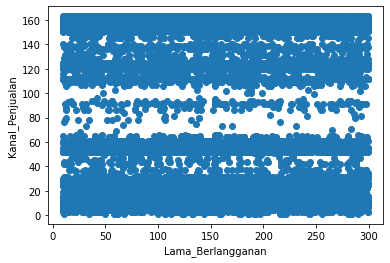

In [262]:
labels = ['Lama_Berlangganan','Kanal_Penjualan']
dtl = DatasetToList(dt,labels)
ScatterPlot(dtl,labels=labels)

1459340440.9948876
708435749.7018464
538162987.7015938
327692793.4460491
189310718.73076075
154665404.98426092
112745891.34065093
102799977.25285786
100690408.50159007


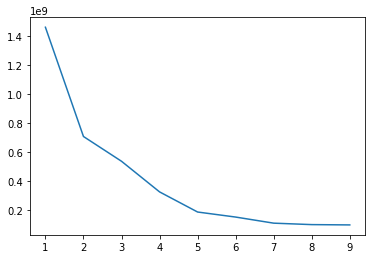

In [220]:
ElbowDistortion(dtl)

##Data Processing

ini sudah clusterd


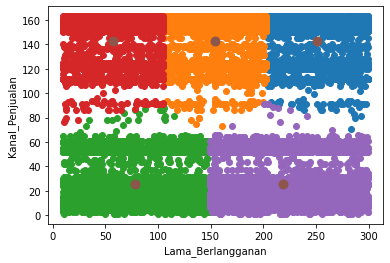

[37992, 44366, 16689, 38065, 19560]


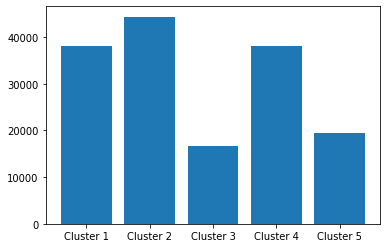

In [263]:
km = KMeans(5,dtl)
kmi = km.predict(dtl)
ScatterPlot(kmi,km.centeroids,labels)
BarGraph(kmi)

ini sudah clusterd


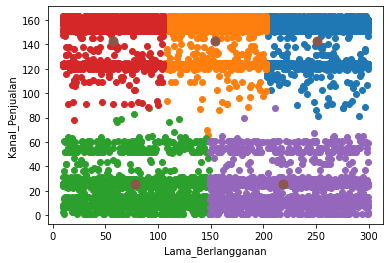

[37992, 44366, 16689, 38065, 19560]


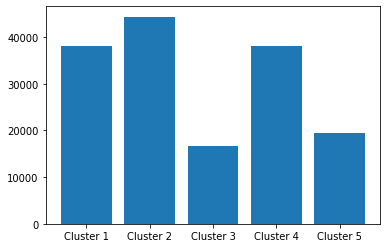

In [264]:
#test the data with dataset test
dtest = DatasetToList(prep,labels)
dtm = km.predict(dtest)
ScatterPlot(dtm,km.centeroids,labels)
BarGraph(kmi)

##Experiments

Changing the labels

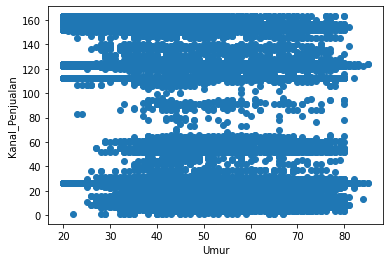

In [265]:
labels = ['Umur','Kanal_Penjualan']
dtl = DatasetToList(dt,labels)
ScatterPlot(dtl,labels=labels)

448649599.0597109
59701080.83962667
23336194.00781985
21695741.541543026
16246204.218854368
16049486.820162877
9296319.082837865
10687380.31990408
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


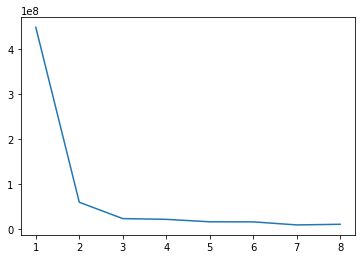

In [266]:
ElbowDistortion(dtl)

ini sudah clusterd


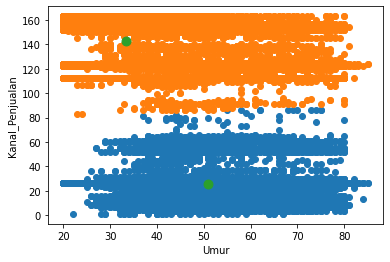

[36258, 120414]


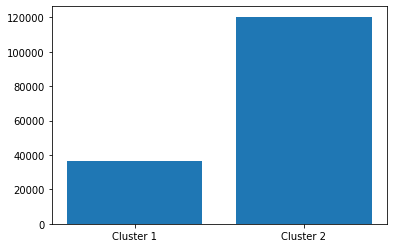

In [269]:
km = KMeans(2,dtl)
kmi = km.predict(dtl)
ScatterPlot(kmi,km.centeroids,labels)
BarGraph(kmi)

1 Dimension

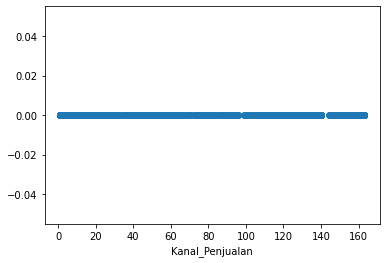

In [179]:
labels = ['Kanal_Penjualan']
dtl = DatasetToList(dt,labels)
ScatterPlot(dtl,labels=labels)

411808929.67553335
31392352.047594167
4401182.415155578
0
0
0
0
0
0
0


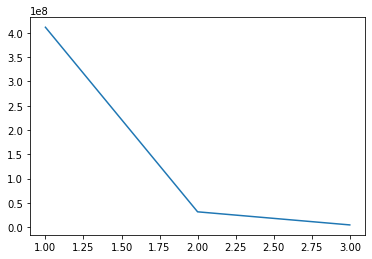

In [180]:
ElbowDistortion(dtl)

ini sudah clusterd


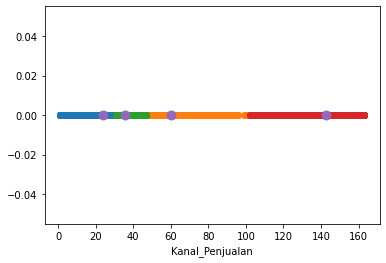

[34156, 1785, 473, 120258]


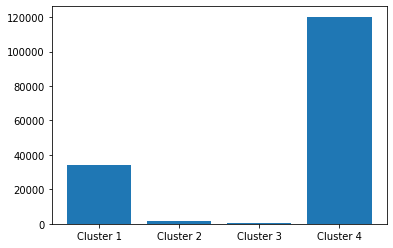

In [181]:
km = KMeans(4,dtl)
kmi = km.predict(dtl)
ScatterPlot(kmi,km.centeroids,labels)
BarGraph(kmi)

3 Dimensions

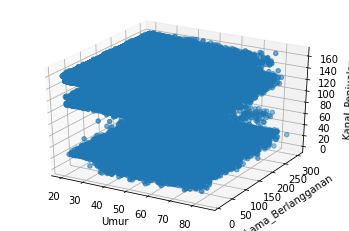

In [182]:
labels = ['Umur','Lama_Berlangganan','Kanal_Penjualan']
dtl = DatasetToList(dt,labels)
ScatterPlot(dtl,labels=labels)

1496181110.3805528
745276417.1948388
507319878.6458137
354012409.38353866
217297373.3465746
175806645.02942342
141105890.55330187
118627886.81664366
129241733.36423182


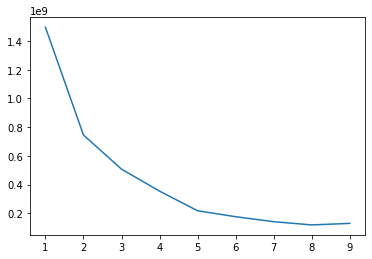

In [183]:
ElbowDistortion(dtl)

ini sudah clusterd


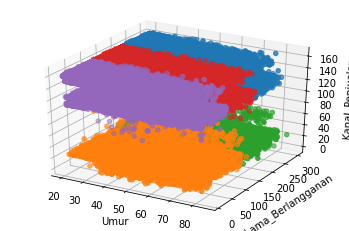

[37991, 20008, 16252, 44363, 38058]


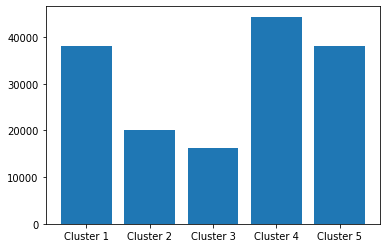

In [184]:
km = KMeans(5,dtl)
kmi = km.predict(dtl)
ScatterPlot(kmi,km.centeroids,labels)
BarGraph(kmi)

Dataset yang berbeda

In [272]:
train = pd.read_csv("sample_data/california_housing_train.csv")
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [186]:
print("Data size before preprocessing: ",len(train))
print("Empty Datas :")
train.isnull().sum()

Data size before preprocessing:  17000
Empty Datas :


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [187]:
detect_outlier(train)

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1076
total_bedrooms        1074
population            1015
households            1032
median_income          563
median_house_value     895
dtype: int64

In [188]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


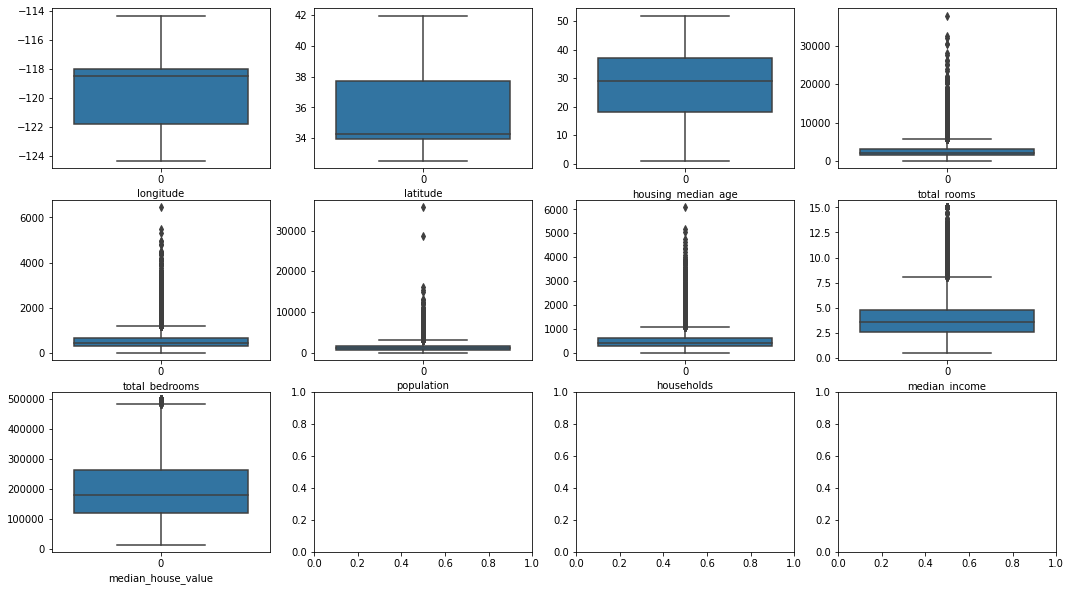

In [189]:
BoxPlot(train)

In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [191]:
train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


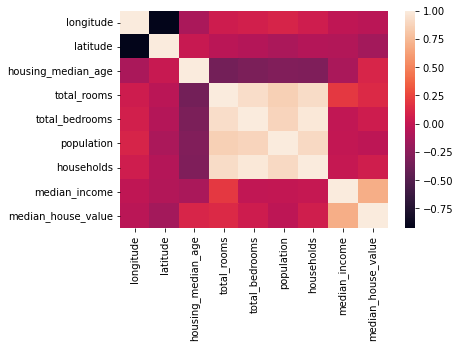

In [192]:
sns.heatmap(train.corr())

In [275]:
dt = PreProcessing(train,dtype=float)
print("Data size after preprocessing: ",len(dt))
print("Empty Datas :")
dt.isnull().sum()

Data size after preprocessing:  14476
Empty Datas :


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [194]:
detect_outlier(dt)

longitude               0
latitude                0
housing_median_age      0
total_rooms           285
total_bedrooms        228
population            253
households            236
median_income         136
median_house_value    216
dtype: int64

In [195]:
dt.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924049,-0.092670,-0.003522,0.036355,0.120781,0.035267,-0.003787,-0.041500
latitude,-0.924049,1.000000,-0.007366,0.001190,-0.051503,-0.151185,-0.073730,-0.089502,-0.158440
housing_median_age,-0.092670,-0.007366,1.000000,-0.294860,-0.227781,-0.189066,-0.197772,-0.162816,0.098250
total_rooms,-0.003522,0.001190,-0.294860,1.000000,0.885902,0.765775,0.879123,0.273447,0.190545
total_bedrooms,0.036355,-0.051503,-0.227781,0.885902,1.000000,0.820265,0.971260,-0.034615,0.089452
population,0.120781,-0.151185,-0.189066,0.765775,0.820265,1.000000,0.860571,-0.007475,-0.015586
households,0.035267,-0.073730,-0.197772,0.879123,0.971260,0.860571,1.000000,0.008847,0.117990
median_income,-0.003787,-0.089502,-0.162816,0.273447,-0.034615,-0.007475,0.008847,1.000000,0.633834
median_house_value,-0.041500,-0.158440,0.098250,0.190545,0.089452,-0.015586,0.117990,0.633834,1.000000


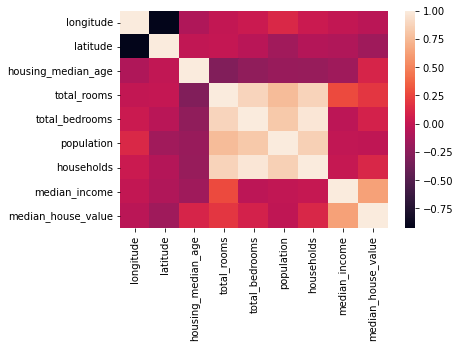

In [196]:
sns.heatmap(dt.corr())

In [197]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14476 entries, 2 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14476 non-null  float64
 1   latitude            14476 non-null  float64
 2   housing_median_age  14476 non-null  float64
 3   total_rooms         14476 non-null  float64
 4   total_bedrooms      14476 non-null  float64
 5   population          14476 non-null  float64
 6   households          14476 non-null  float64
 7   median_income       14476 non-null  float64
 8   median_house_value  14476 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [198]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000
mean,-119.598330,35.691313,29.447637,2147.544142,445.662407,1197.756770,417.053399,3.584950,187286.508428
std,2.007507,2.169496,12.215264,1085.459131,220.673772,600.681677,205.082254,1.449423,94255.016600
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.770000,33.940000,19.000000,1387.000000,287.000000,768.000000,272.000000,2.491325,112900.000000
50%,-118.580000,34.290000,30.000000,1979.000000,411.000000,1112.000000,387.000000,3.399750,170000.000000
75%,-118.020000,37.740000,38.000000,2778.250000,578.000000,1555.000000,539.000000,4.507425,241700.000000
max,-114.560000,41.950000,52.000000,5684.000000,1173.000000,3117.000000,1090.000000,8.059900,483300.000000


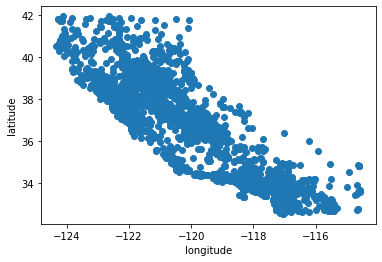

In [276]:
labels = ['longitude','latitude']
dtl = DatasetToList(dt,labels)
ScatterPlot(dtl,labels=labels)

126465.12100648684
19936.27736032951
13491.616525927073
0
0
0
0
0
0
0


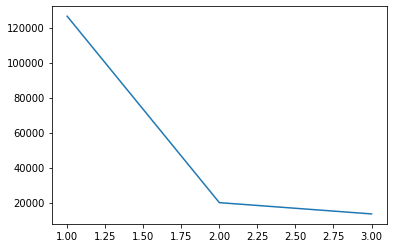

In [200]:
ElbowDistortion(dtl)

ini sudah clusterd


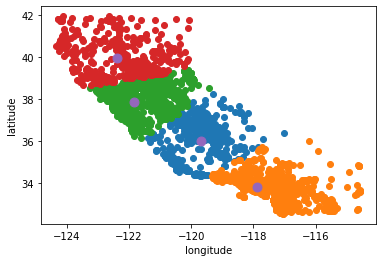

[1362, 7532, 4815, 767]


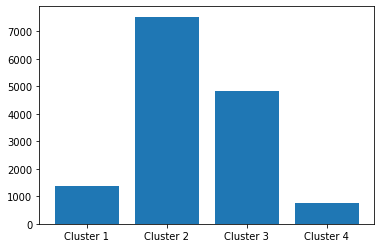

In [277]:
km = KMeans(4,dtl)
kmi = km.predict(dtl)
ScatterPlot(kmi,km.centeroids,labels)
BarGraph(kmi)

ini sudah clusterd


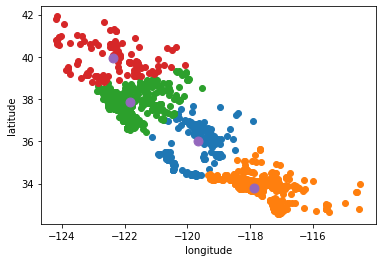

[1362, 7532, 4815, 767]


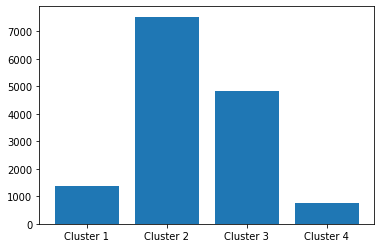

In [278]:
test = pd.read_csv("sample_data/california_housing_test.csv")
prep = PreProcessing(test,float)
dtest = DatasetToList(prep,labels)
dtm = km.predict(dtest)
ScatterPlot(dtm,km.centeroids,labels)
BarGraph(kmi)